## House Prices
<hr>

### Fonte: Foi usado o dataset house-prices disponibilizado em aula.
#### Mais detalhes dele aqui: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
#### Conteúdo de apoio: https://cursos.alura.com.br/course/data-science-modelo-regressao-linear/

### Descrição:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Com a regressão linear: O Objetivo é fazer a predição do valor de venda de uma casa com base no dataset acima.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Com a regressão logística: O Objetivo é fazer a classificação de um valor.</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados foram coletados durante um treinamento no portal Alura.</p>


### Vamos usar os modelos:
<ul style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <li> Regressão linear</li>
    <li> Regressão logística </li>
    <li> Árvore de decisão </li>
</ul>



### Dados:
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    
OverallQual: avalia o material geral e o acabamento da casa

       10 muito excelente
       9 excelente
       8 muito bom
       7 bom
       6 acima da média
       5 média
       4 abaixo da média
       3 justo
       2 pobres
       1 muito ruim
	
OverallCond: avalia a condição geral da casa

       10 muito excelente
       9 excelente
       8 muito bom
       7 bom
       6 acima da média
       5 média
       4 abaixo da média
       3 justo
       2 pobres
       1 muito ruim
		
YearBuilt: data de construção original
</ul>

### Importando bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


uri = "./house-prices.csv"


### Limpando os dados

In [2]:
df = pd.read_csv(uri).select_dtypes(exclude=['object'])
df = df.dropna(axis='columns')

### Visualização dos dados


In [3]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
df.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,9937,5,6,1965,1965,830,290,136,...,736,68,0,0,0,0,0,6,2008,147500


In [5]:
df.describe().round(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,10516.83,6.10,5.58,1971.27,1984.87,443.64,46.55,567.24,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,9981.26,1.38,1.11,30.20,20.65,456.10,161.32,441.87,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,223.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,9478.50,6.00,5.00,1973.00,1994.00,383.50,0.00,477.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,11601.50,7.00,6.00,2000.00,2004.00,712.25,0.00,808.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,215245.00,10.00,9.00,2010.00,2010.00,5644.00,1474.00,2336.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### Matriz de correlação


In [6]:
df.corr().round(4)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0000,0.0112,-0.0332,-0.0284,0.0126,-0.0127,-0.0220,-0.0050,-0.0060,-0.0079,...,-0.0296,-0.0005,0.0029,-0.0466,0.0013,0.0570,-0.0062,0.0212,0.0007,-0.0219
MSSubClass,0.0112,1.0000,-0.1398,0.0326,-0.0593,0.0279,0.0406,-0.0698,-0.0656,-0.1408,...,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0843
LotArea,-0.0332,-0.1398,1.0000,0.1058,-0.0056,0.0142,0.0138,0.2141,0.1112,-0.0026,...,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2638
OverallQual,-0.0284,0.0326,0.1058,1.0000,-0.0919,0.5723,0.5507,0.2397,-0.0591,0.3082,...,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.7910
OverallCond,0.0126,-0.0593,-0.0056,-0.0919,1.0000,-0.3760,0.0737,-0.0462,0.0402,-0.1368,...,-0.0033,-0.0326,0.0704,0.0255,0.0548,-0.0020,0.0688,-0.0035,0.0439,-0.0779
YearBuilt,-0.0127,0.0279,0.0142,0.5723,-0.3760,1.0000,0.5929,0.2495,-0.0491,0.1490,...,0.2249,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5229
YearRemodAdd,-0.0220,0.0406,0.0138,0.5507,0.0737,0.5929,1.0000,0.1285,-0.0678,0.1811,...,0.2057,0.2263,-0.1939,0.0453,-0.0387,0.0058,-0.0103,0.0215,0.0357,0.5071
BsmtFinSF1,-0.0050,-0.0698,0.2141,0.2397,-0.0462,0.2495,0.1285,1.0000,-0.0501,-0.4953,...,0.2043,0.1118,-0.1023,0.0265,0.0620,0.1405,0.0036,-0.0157,0.0144,0.3864
BsmtFinSF2,-0.0060,-0.0656,0.1112,-0.0591,0.0402,-0.0491,-0.0678,-0.0501,1.0000,-0.2093,...,0.0679,0.0031,0.0365,-0.0300,0.0889,0.0417,0.0049,-0.0152,0.0317,-0.0114
BsmtUnfSF,-0.0079,-0.1408,-0.0026,0.3082,-0.1368,0.1490,0.1811,-0.4953,-0.2093,1.0000,...,-0.0053,0.1290,-0.0025,0.0208,-0.0126,-0.0351,-0.0238,0.0349,-0.0413,0.2145


In [7]:
# Paleta de cores

sns.set_palette("Accent")

sns.set_style("darkgrid")


Text(0.5, 1.0, 'Valor de venda das casas')

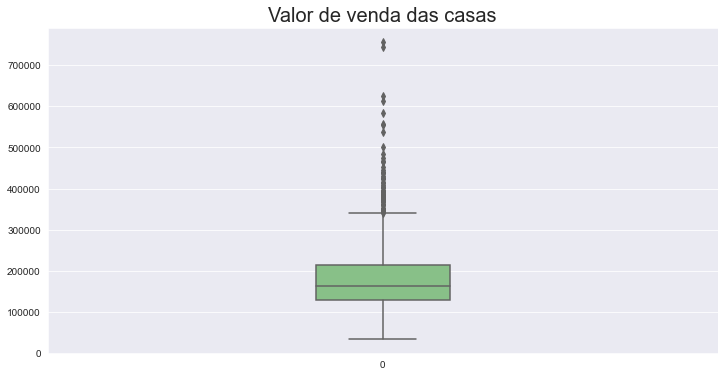

In [8]:
# Box plot da variável depedente Y
# Sales Price = Preço de venda

ax = sns.boxplot(data=df['SalePrice'], orient='v', width=0.2)

ax.figure.set_size_inches(12,6)
ax.set_title('Valor de venda das casas', fontsize=20)




## Investigando a variável dependente y

OverallQual: avalia o material geral e o acabamento da casa

       10 muito excelente
       9 excelente
       8 muito bom
       7 bom
       6 acima da média
       5 média
       4 abaixo da média
       3 justo
       2 pobres
       1 muito ruim

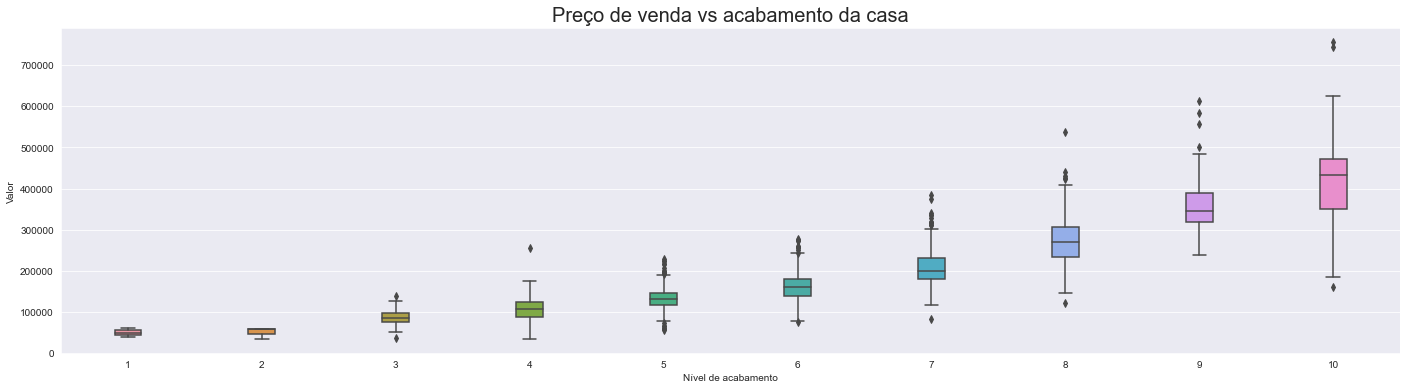

In [9]:
ax = sns.boxplot(y='SalePrice', x ='OverallQual', data=df, orient='v', width=0.2)

ax.figure.set_size_inches(24,6)
ax.set_title('Preço de venda vs acabamento da casa', fontsize=20)

ax.set_ylabel('Valor');
ax.set_xlabel('Nível de acabamento');

# Podemos notar no gráfico abaixo que casas mais bem acabadas são em sua maioria mais caras


<ipython-input-10-0dc8550e6bc1>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Distribuição de frequência', fontSize=20)
<ipython-input-10-0dc8550e6bc1>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Preço', fontSize=16)
<ipython-input-10-0dc8550e6bc1>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Nível de acabamento', fontSize=16)
No handles with labels found to put in legend.


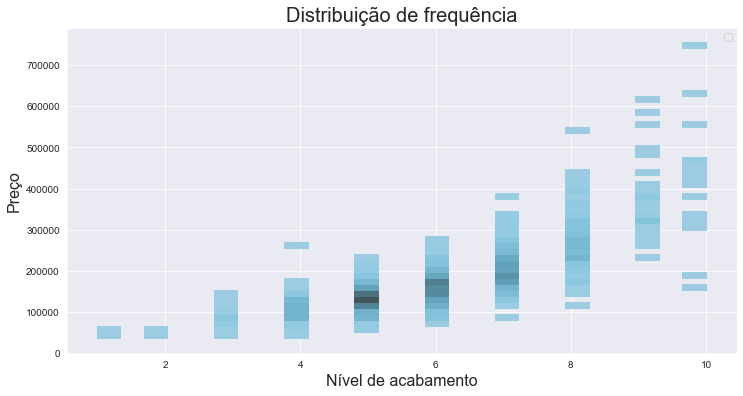

In [10]:
# Distribuição de frequência da variavel dependente y 
ax = sns.histplot(df, y='SalePrice', x ='OverallQual', color="skyblue", kde=True )
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência', fontSize=20)
ax.set_ylabel('Preço', fontSize=16)
ax.set_xlabel('Nível de acabamento', fontSize=16)


plt.legend() 
plt.show()



# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
O modelo de regressão linear surgiu do conceito de <b>correlação linear</b>, que calcula o relacionamento entre duas variáveis. Traduzindo, dados A e B, quanto que A explica B.
    Ele é utilizado para realizar previsões, principalmente quando são <b>variáveis numéricas</b> e apresentam algum tipo de tendência de crescimento/decrescimento constante, ou seja, <b>linear</b>.
    
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Vamos exemplificar com uma relação simples de <b>Lucro x Produção</b>, onde o esperado é quanto maior a produção, maior será o lucro.
Dado o gráfico acima, a linha azul é calculada pela equação , onde y (lucro) é a variável alvo que o modelo tentará prever, x (produção) é a variável explicativa, α é uma constante onde o valor é onde a reta encosta no eixo vertical (no nosso caso, ali bem perto do 2) e ß representa a inclinação da reta. O ε representa o valor de possíveis erros
O modelo tem como objetivo calcular os valores para α e ß, dado um dataset disponível.
Os valores resultantes variam entre -1 a 1, onde -1 indicaria uma correção inversa de 100% e 1 uma correlação de 100%.
</p>
  <p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>  <b>Tá, mas e se o nosso dataset tiver mais de duas variáveis?</b>
A lógica será a mesma, teremos uma variável alvo e as outras serão tratadas como variáveis explicativas e teremos que calcular o valor de ß para cada uma delas.
</p>


### Fonte: https://www.datageeks.com.br/regressao-linear/




## Usaremos Regressão Linear Multipla
<img width='600px' src='./regressao_linear.png'>

### importando o train_test_split

In [11]:

from sklearn.model_selection import train_test_split



### Criando uma Series para armazenar a váriavel y


In [12]:
y = df['SalePrice']

# Criando um dataframe para armazernar a váriavel explicativa x (Variáveis explicativas nesse caso são as condições de 
# acabamento - OverallQual, Condição geral da casa - OverallCond, Ano de Construção - YearBuilt )
X = df[['OverallQual', 'OverallCond', 'YearBuilt', 'LotArea']] 

### Criando dataset de treino e teste


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2811)

### Verificando o tamanho dos dataframes gerados pelo train_test_split

In [14]:
X_train.shape

(1095, 4)

In [15]:
X_test.shape

(365, 4)

## Importando LinearRegression e metrics da biblioteca scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### Instanciando LinearRegression()

In [17]:
model = LinearRegression()

## Utilizando o método fit() do "model" para estimar nosso modelo linear utilizando o y_train e X_train

In [18]:
model.fit(X_train, y_train)

LinearRegression()

## Coeficiênte de determinação R² do modelo estimado com os dados do TREINO
### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.
#### Quanto maior o R² melhor o modelo explica o valor
$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [19]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.66


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [20]:
y_predict = model.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo


In [21]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round())

# R² igual a 1 significa que o modelo está bem explicado


R² = 1.0


# Previsões com Regressão Linear

### Dados de entrada

In [22]:
entrada = X_test[0:2]
entrada

,OverallQual,OverallCond,YearBuilt,LotArea
812,5,5,1952,8712
272,8,7,1999,11764


### Previsão pontual do modelo

In [23]:
model.predict(entrada)
# Valores previstos pros dados selecionados acima

array([124092.14946035, 273614.33742891])

In [24]:
OverallQual = 10
OverallCond = 10
YearBuilt = 2022
LotArea = 1000
print('$ {0:.2f} é valor da casa'.format(model.predict([[OverallQual, OverallCond, YearBuilt, LotArea]])[0]))

$ 357073.80 é valor da casa


## Interpretando os valores

In [25]:
model.intercept_

-831874.0275040482

In [26]:
type(model.intercept_)

numpy.float64

In [27]:
model.coef_

array([4.10001672e+04, 2.45664178e+03, 3.72420794e+02, 1.34489693e+00])

In [28]:
X.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'LotArea'], dtype='object')

In [29]:
index=['interceptor', 'OverallQual', 'OverallCond', 'YearBuilt', 'LotArea']

### Criar um dataframe pra armazenar os coeficientes do model

In [30]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index = index, columns=['Params'])

,Params
interceptor,-831874.027504
OverallQual,41000.167215
OverallCond,2456.641780
YearBuilt,372.420794
LotArea,1.344897


### Interpretação dos coeficientes
<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no preço de uma casa seria de <b>$ -831874.02</b>. O interceptor representa o efeito da média de Y tendo as variáveis explicativas excluídas. 
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>OverallQual</b> → Mantendo-se os valores constantes, gera uma variação média no preço da casa de <b>$ 41000.16</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>OverallCond</b> → Mantendo-se os valores constantes, geraria uma variação média no preço da casa de <b>$ 2456.64</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>YearBuilt</b> → Mantendo-se os valores constantes, geraria uma variação média no preço da casa de <b>$ 372.42</b>.
</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>YearBuilt</b> → Mantendo-se os valores constantes, geraria uma variação média no preço da casa de <b>$ 1.34</b>.
</p>



## Análises gráficas de previsão do modelo

In [31]:
y_previst_train = model.predict(X_train)

### Gráfico de dispersão

#### O resultado ideal no gráfico seria que os valores ficassem o mais próximo possível do eixo, formando ao longo da linha reta, podemos observar que há uma tendencia de dispersão no eixo y conforme os valores vão aumentando ou diminuindo.

<ipython-input-32-92a7d1a047d2>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Previsão X Valores reais', fontSize=20)
<ipython-input-32-92a7d1a047d2>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
<ipython-input-32-92a7d1a047d2>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Preço das casas - Real', fontSize=16)


<AxesSubplot:title={'center':'Previsão X Valores reais'}, xlabel='Preço das casas - Previsto', ylabel='Preço das casas - Real'>

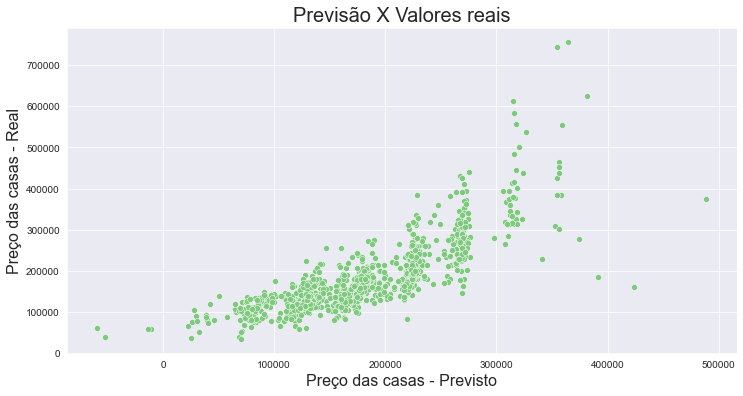

In [32]:
ax = sns.scatterplot(x=y_previst_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Valores reais', fontSize=20)
ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
ax.set_ylabel('Preço das casas - Real', fontSize=16)
ax

### Calculando os resíduos

In [33]:
residuo = y_train - y_previst_train

In [34]:
residuo

1404    76860.761134
442     45412.409669
246    -20398.874350
518     27674.856211
1047     4549.347125
            ...     
727    -30195.461647
341      2529.108967
1108    -1095.676677
1006    -8013.087553
447    -26688.772545
Name: SalePrice, Length: 1095, dtype: float64

### Gráfico de dispersão entre valor estimado e resíduos
#### Verificando a hipótese de variância constante dos resíduos

<ipython-input-35-d114c102f7fa>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Resíduos X Previsão', fontSize=20)
<ipython-input-35-d114c102f7fa>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
<ipython-input-35-d114c102f7fa>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Resíduos', fontSize=16)


<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Preço das casas - Previsto', ylabel='Resíduos'>

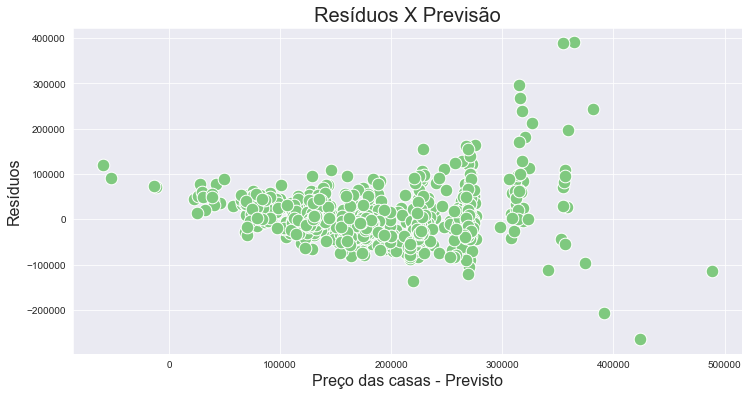

In [35]:
ax = sns.scatterplot(x=y_previst_train, y=residuo, s=160)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontSize=20)
ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
ax.set_ylabel('Resíduos', fontSize=16)
ax

### Uma solução é utilizar os resíduos ao quadrado

<img width='800px' src='./var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

O primeiro caso de heterocedasticidade não é um bom resultado.
Resultados tais como os demais indica que exita um problema nos dados.

<ipython-input-36-2c3b0e723104>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Resíduos X Previsão', fontSize=20)
<ipython-input-36-2c3b0e723104>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
<ipython-input-36-2c3b0e723104>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Resíduos²', fontSize=16)


<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Preço das casas - Previsto', ylabel='Resíduos²'>

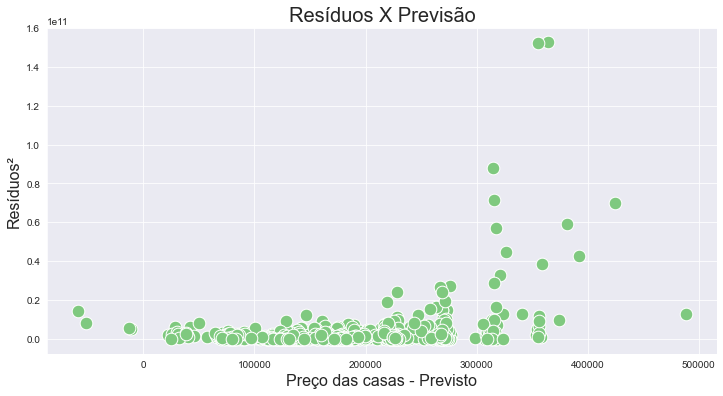

In [36]:
ax = sns.scatterplot(x=y_previst_train, y=residuo**2, s=160)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontSize=20)
ax.set_xlabel('Preço das casas - Previsto', fontSize=16)
ax.set_ylabel('Resíduos²', fontSize=16)
ax

C:\Users\Ester\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-37-20511517ed7f>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Distribuição de frequência dos resíduos', fontSize=18)


<AxesSubplot:title={'center':'Distribuição de frequência dos resíduos'}, xlabel='Litros', ylabel='Density'>

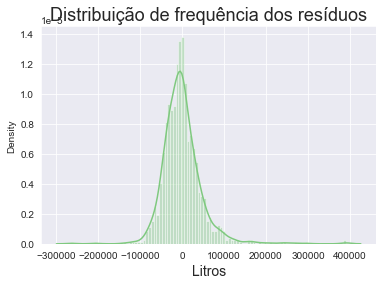

In [37]:
### Gráfico de distribuição de frequências dos resíduos
ax = sns.distplot(residuo, bins=100)
ax.set_title('Distribuição de frequência dos resíduos', fontSize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# No centro da curva os valores que mais se repetem no modelo

## Comparando os modelos

### Estimando um novo modelo com substituição de variável explicativa por MSSubClass

In [38]:
X2 = df[['OverallQual', 'OverallCond', 'MSSubClass', 'LotArea']] 

### Criando os datasets de treino e teste

In [39]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=2811)

### Instânciando LinearRegression()

In [40]:
model_2 = LinearRegression()

In [41]:
model_2.fit(X2_train, y2_train)

LinearRegression()

### Obter o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [42]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.66


In [43]:
print('R² = {}'.format(model_2.score(X2_train, y2_train).round(2)))

R² = 0.66


### Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [44]:
y_previst = model.predict(X_test)
y_previst_2 = model_2.predict(X2_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [45]:
print('R² = {}'.format((metrics.r2_score(y2_test, y_previst_2)).round(2)))

R² = 0.7


In [46]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round())


R² = 1.0


<p style='font-size: 25px; line-height: 2; text-align: justify;'>Podemos concluir que o modelo com o ano de construção(YearBuilt) explica melhor os dados do que o modelo feito acima com 
o tipo de moradia envolvida na venda (MSSubClass).</p>

## Erro quadrático médio e raiz do erro quadrático médio com a variável MSSubClass
Tem como objetivo encontrar a diferença média de um valor e o seu valor inicial. É destinado a compreender um erro de previsão.



In [47]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previst_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previst_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previst_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métrics'])

,Métrics
EQM,1.559225e+09
REQM,3.948703e+04
R²,7.000000e-01


## Erro quadrático médio e raiz do erro quadrático médio com a variável YearBuilt
Podemos ver no resultado abaixo que o resultado se comporta melhor para variável YearBuilt pois o EQM e o REQM são menores.

In [48]:
EQM = metrics.mean_squared_error(y_test, y_previst).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previst)).round(2)
R2 = metrics.r2_score(y_test, y_previst).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métrics'])

,Métrics
EQM,1.539789e+09
REQM,3.924015e+04
R²,7.000000e-01
